# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Funções

In [2]:
def normal_test(list, feature, array, alpha=0.05):
    p = normaltest(array).pvalue
    list.append({
        'feature': feature,
        'p_valor': p
    })
    if p < alpha:
        string = f'Rejeita H0, A feature {feature} NÃO ESTÁ normalmente distribuída'
        resultado = None
    elif p >= alpha:
        string = f'Aceita H0, A feature {feature} ESTÁ normalmente distribuída'
        resultado = 'Normal'
    else:
        string = f'Erro feature {feature}'
        resultado = None
    return string, resultado

# Lendo os Dados

In [3]:
train_label = pd.read_csv('../data/train_labels.csv')
train_label

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [4]:
df = pd.read_csv('../data/train_data.csv')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983


In [5]:
df = df.groupby('customer_ID').tail(3)
df.reset_index(drop=True, inplace=True)
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-01-11,0.909811,0.005715,0.002829,1.004798,0.008175,0.098882,0.001853,0.003238,...,NaN,NaN,NaN,0.000427,0.004594,0.003613,NaN,0.007568,0.003004,0.006362
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,...,NaN,NaN,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,NaN,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533
3,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-01-26,0.880925,0.211731,0.010583,1.002313,0.005955,0.130116,0.003628,0.002802,...,NaN,NaN,NaN,0.007274,0.008972,0.002497,NaN,0.003979,0.006627,0.002178
4,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,...,NaN,NaN,NaN,0.006658,0.004627,0.004820,NaN,0.008272,0.002528,0.003584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360396,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,0.754452,0.001509,0.025988,0.206945,0.009382,0.425783,0.007432,0.087275,...,NaN,NaN,NaN,1.004394,0.005160,0.941114,0.434979,1.000731,0.004325,0.189733
1360397,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,...,NaN,NaN,NaN,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527
1360398,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566
1360399,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983


In [6]:
df = df.merge(train_label, how='left', left_on='customer_ID', right_on='customer_ID')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-01-11,0.909811,0.005715,0.002829,1.004798,0.008175,0.098882,0.001853,0.003238,...,NaN,NaN,0.000427,0.004594,0.003613,NaN,0.007568,0.003004,0.006362,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,...,NaN,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0
3,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-01-26,0.880925,0.211731,0.010583,1.002313,0.005955,0.130116,0.003628,0.002802,...,NaN,NaN,0.007274,0.008972,0.002497,NaN,0.003979,0.006627,0.002178,0
4,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,...,NaN,NaN,0.006658,0.004627,0.004820,NaN,0.008272,0.002528,0.003584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360396,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,0.754452,0.001509,0.025988,0.206945,0.009382,0.425783,0.007432,0.087275,...,NaN,NaN,1.004394,0.005160,0.941114,0.434979,1.000731,0.004325,0.189733,1
1360397,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,...,NaN,NaN,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527,1
1360398,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566,0
1360399,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983,0


# EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,1350716.0,0.638845,0.261277,-4.589548e-01,0.454618,0.682911,0.861217,1.010000
D_39,1360401.0,0.183407,0.337242,5.957676e-09,0.004885,0.009760,0.267690,5.268649
B_1,1360401.0,0.136841,0.227172,-3.571172e+00,0.009037,0.033918,0.150135,1.324060
B_2,1360128.0,0.595894,0.410702,9.192280e-09,0.075163,0.813537,1.002056,1.010000
R_1,1360401.0,0.099601,0.261891,3.240394e-09,0.002936,0.005881,0.008826,3.006102
...,...,...,...,...,...,...,...,...
D_142,234068.0,0.393530,0.240808,-1.453934e-02,0.198551,0.386022,0.572461,2.229368
D_143,1333792.0,0.180396,0.380318,1.653580e-08,0.003030,0.006061,0.009091,1.010000
D_144,1360100.0,0.051541,0.180990,1.969412e-08,0.002751,0.005498,0.008243,1.343326
D_145,1333792.0,0.063570,0.196589,2.811854e-09,0.003032,0.006064,0.009095,4.827630


### Valores Nulos

In [8]:
df_null = pd.DataFrame(df.isna().sum()/len(df)*100, columns=['null_perc'])
df_null

,null_perc
customer_ID,0.000000
S_2,0.000000
P_2,0.711922
D_39,0.000000
B_1,0.000000
...,...
D_142,82.794191
D_143,1.955967
D_144,0.022126
D_145,1.955967


In [9]:
df_null = df_null.loc[df_null['null_perc']>0]
df_null

,null_perc
P_2,0.711922
B_2,0.020068
S_3,18.214923
D_41,0.020068
B_3,0.020068
...,...
D_141,1.955967
D_142,82.794191
D_143,1.955967
D_144,0.022126


In [10]:
df_null = df_null.loc[df_null['null_perc']>14]
df_null

,null_perc
S_3,18.214923
D_42,86.673635
D_43,29.362004
D_46,20.781079
D_49,88.962372
D_50,57.481140
D_53,71.772955
S_7,18.214923
D_56,53.932186
S_9,48.914548


In [11]:
useless_columns = df_null.index.tolist()
useless_columns

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'D_77',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'S_27',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [12]:
df.drop(useless_columns, axis=1, inplace=True)
df.drop('S_2', axis=1, inplace=True)

In [13]:
df

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.909811,0.005715,0.002829,1.004798,0.008175,0.001853,0.003238,0.002389,0.000836,...,0.001501,0.005256,0.001325,0.000427,0.004594,0.003613,0.007568,0.003004,0.006362,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.937349,0.002425,0.019837,1.008307,0.000607,0.006174,0.007454,0.005109,0.080204,...,0.004304,0.000122,0.007725,0.001563,0.001976,0.002569,0.001098,0.006346,0.004204,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.001604,0.007174,0.003258,0.070793,...,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.005810,0.002970,0.008533,0
3,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880925,0.211731,0.010583,1.002313,0.005955,0.003628,0.002802,0.003104,0.002438,...,0.001224,0.007286,0.004444,0.007274,0.008972,0.002497,0.003979,0.006627,0.002178,0
4,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.878856,0.536290,0.034558,1.005419,0.007248,0.006274,0.008733,0.000123,0.020876,...,0.001726,0.009592,0.006052,0.006658,0.004627,0.004820,0.008272,0.002528,0.003584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360396,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754452,0.001509,0.025988,0.206945,0.009382,0.007432,0.087275,0.130124,0.222945,...,0.000847,0.008586,0.000244,1.004394,0.005160,0.941114,1.000731,0.004325,0.189733,1
1360397,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754129,0.008619,0.015838,0.714486,0.000993,0.003392,0.050048,0.133062,0.237388,...,0.002679,0.000479,0.006828,1.009894,0.004478,0.949723,1.009310,0.002502,0.185527,1
1360398,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.983019,0.443984,0.013151,0.815422,0.003457,0.002111,0.012343,0.002350,0.016425,...,0.002946,0.006060,0.005076,0.009955,0.009994,0.001088,0.005693,0.006773,0.005566,0
1360399,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.969861,0.442553,0.009855,1.003541,0.005117,0.009930,0.008578,0.006509,0.004424,...,0.008511,0.003811,0.008682,0.005541,0.006564,0.009883,0.008123,0.001168,0.003983,0


### Target

<AxesSubplot:xlabel='target', ylabel='count'>

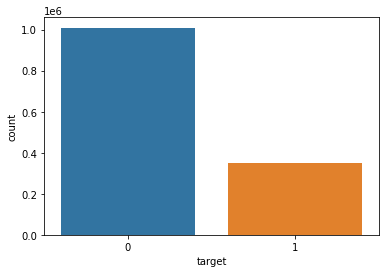

In [14]:
sns.countplot(df['target'])

### Features Categóricas

In [15]:
cat_data = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

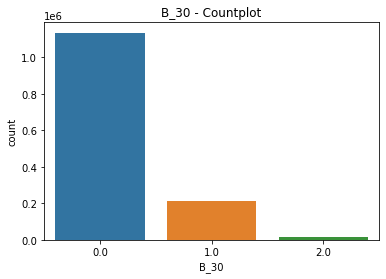

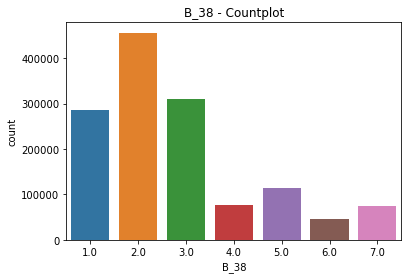

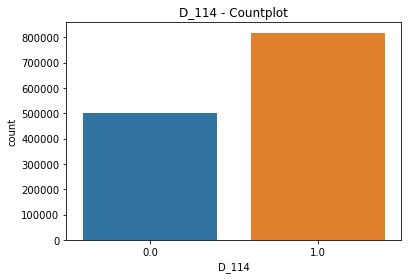

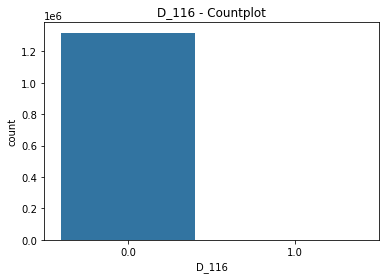

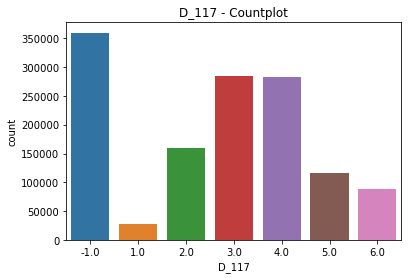

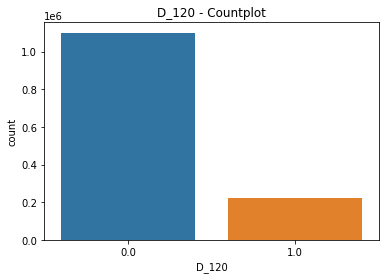

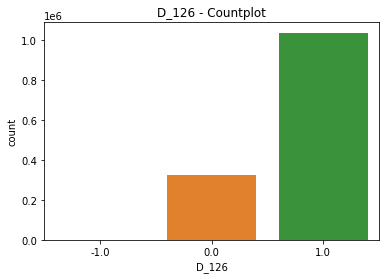

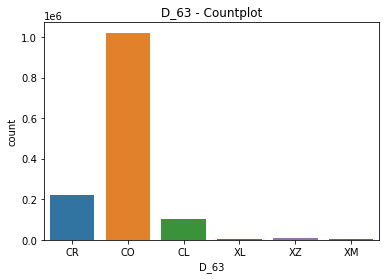

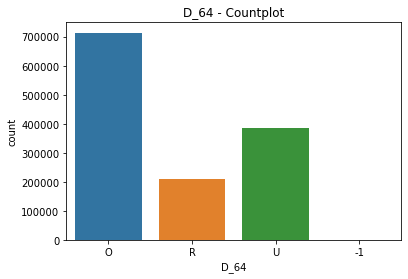

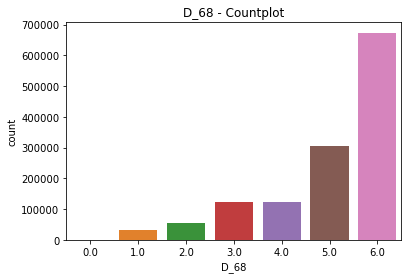

In [16]:
for col in cat_data:
    sns.countplot(df[col])
    plt.title(f'{col} - Countplot')
    plt.show()

### Features Numéricas

##### Teste de Normalidade

In [17]:
p_valor = []

for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        array = df[col].values
        string, resultado = normal_test(p_valor, col, array)
        print(string)

Erro feature P_2
Rejeita H0, A feature D_39 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_1 NÃO ESTÁ normalmente distribuída
Erro feature B_2
Rejeita H0, A feature R_1 NÃO ESTÁ normalmente distribuída
Erro feature D_41
Erro feature B_3
Erro feature D_44
Rejeita H0, A feature B_4 NÃO ESTÁ normalmente distribuída
Erro feature D_45
Rejeita H0, A feature B_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_2 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature D_47 NÃO ESTÁ normalmente distribuída
Erro feature D_48
Erro feature B_6
Rejeita H0, A feature B_7 NÃO ESTÁ normalmente distribuída
Erro feature B_8
Rejeita H0, A feature D_51 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_9 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_3 NÃO ESTÁ normalmente distribuída
Erro feature D_52
Erro feature P_3
Rejeita H0, A feature B_10 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature S_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_11 NÃO ESTÁ n

##### Correlação

In [18]:
df_corr = df.drop('customer_ID', axis=1).corr()
df_corr

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
P_2,1.000000,-0.279108,-0.390379,0.587853,-0.536608,-0.382126,-0.487788,-0.595136,-0.468022,0.336471,...,-0.232881,-0.150756,-0.012571,-0.186215,-0.147077,-0.181553,-0.186230,0.008769,-0.165915,-0.654318
D_39,-0.279108,1.000000,0.222276,-0.255467,0.301433,0.564932,0.212987,0.187969,0.205103,0.000647,...,0.071335,0.051032,-0.001144,0.043017,0.038151,0.042616,0.042965,0.006406,0.033419,0.284870
B_1,-0.390379,0.222276,1.000000,-0.627625,0.261482,0.236965,0.735995,0.340630,0.505220,-0.118369,...,0.155967,0.117552,0.044502,0.107544,0.059948,0.106625,0.107532,0.034684,0.082894,0.435524
B_2,0.587853,-0.255467,-0.627625,1.000000,-0.353059,-0.304578,-0.721760,-0.475943,-0.520534,0.186759,...,-0.220375,-0.158731,-0.024450,-0.162992,-0.105667,-0.160886,-0.163005,-0.037176,-0.132132,-0.541544
R_1,-0.536608,0.301433,0.261482,-0.353059,1.000000,0.361581,0.310849,0.448820,0.336231,-0.139316,...,0.155545,0.106182,0.031850,0.092105,0.080002,0.090677,0.092131,0.003396,0.082048,0.448147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_141,-0.181553,0.042616,0.106625,-0.160886,0.090677,0.061876,0.142280,0.130925,0.096737,-0.146774,...,0.109506,0.073255,0.003100,0.998106,0.339663,1.000000,0.997736,0.589181,0.632175,0.126194
D_143,-0.186230,0.042965,0.107532,-0.163005,0.092131,0.062765,0.143640,0.132606,0.097103,-0.150166,...,0.110068,0.073376,0.003245,0.999595,0.340335,0.997736,1.000000,0.562394,0.645810,0.129222
D_144,0.008769,0.006406,0.034684,-0.037176,0.003396,0.009135,0.041104,0.018039,0.034878,-0.032985,...,0.036564,0.032376,-0.001352,0.563209,-0.040014,0.589181,0.562394,1.000000,0.210475,-0.005309
D_145,-0.165915,0.033419,0.082894,-0.132132,0.082048,0.054507,0.116342,0.114804,0.071363,-0.128450,...,0.076720,0.049502,0.002119,0.645765,0.221151,0.632175,0.645810,0.210475,1.000000,0.117111


In [19]:
df_corr_features = df_corr.drop('target', axis=1)
df_corr_features.drop('target', axis=0, inplace=True)
df_corr_features

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
P_2,1.000000,-0.279108,-0.390379,0.587853,-0.536608,-0.382126,-0.487788,-0.595136,-0.468022,0.336471,...,-0.230591,-0.232881,-0.150756,-0.012571,-0.186215,-0.147077,-0.181553,-0.186230,0.008769,-0.165915
D_39,-0.279108,1.000000,0.222276,-0.255467,0.301433,0.564932,0.212987,0.187969,0.205103,0.000647,...,0.066185,0.071335,0.051032,-0.001144,0.043017,0.038151,0.042616,0.042965,0.006406,0.033419
B_1,-0.390379,0.222276,1.000000,-0.627625,0.261482,0.236965,0.735995,0.340630,0.505220,-0.118369,...,0.153800,0.155967,0.117552,0.044502,0.107544,0.059948,0.106625,0.107532,0.034684,0.082894
B_2,0.587853,-0.255467,-0.627625,1.000000,-0.353059,-0.304578,-0.721760,-0.475943,-0.520534,0.186759,...,-0.220700,-0.220375,-0.158731,-0.024450,-0.162992,-0.105667,-0.160886,-0.163005,-0.037176,-0.132132
R_1,-0.536608,0.301433,0.261482,-0.353059,1.000000,0.361581,0.310849,0.448820,0.336231,-0.139316,...,0.146332,0.155545,0.106182,0.031850,0.092105,0.080002,0.090677,0.092131,0.003396,0.082048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_140,-0.147077,0.038151,0.059948,-0.105667,0.080002,0.049666,0.088066,0.105905,0.058149,-0.084279,...,0.056363,0.061434,0.036957,0.002747,0.340640,1.000000,0.339663,0.340335,-0.040014,0.221151
D_141,-0.181553,0.042616,0.106625,-0.160886,0.090677,0.061876,0.142280,0.130925,0.096737,-0.146774,...,0.112639,0.109506,0.073255,0.003100,0.998106,0.339663,1.000000,0.997736,0.589181,0.632175
D_143,-0.186230,0.042965,0.107532,-0.163005,0.092131,0.062765,0.143640,0.132606,0.097103,-0.150166,...,0.112866,0.110068,0.073376,0.003245,0.999595,0.340335,0.997736,1.000000,0.562394,0.645810
D_144,0.008769,0.006406,0.034684,-0.037176,0.003396,0.009135,0.041104,0.018039,0.034878,-0.032985,...,0.042800,0.036564,0.032376,-0.001352,0.563209,-0.040014,0.589181,0.562394,1.000000,0.210475


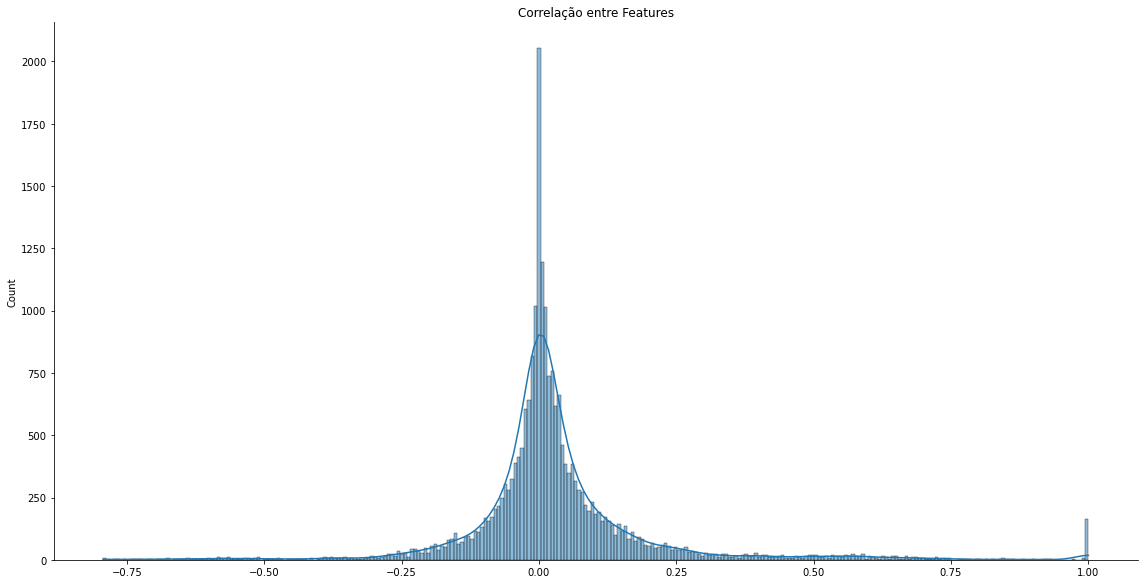

In [20]:
features_corr_array = df_corr_features.values.flatten()
sns.displot(data=features_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação entre Features')
plt.show()

In [21]:
df_corr_target = df_corr[['target']]
df_corr_target.drop('target', axis=0, inplace=True)
df_corr_target

,target
P_2,-0.654318
D_39,0.284870
B_1,0.435524
B_2,-0.541544
R_1,0.448147
...,...
D_140,0.124823
D_141,0.126194
D_143,0.129222
D_144,-0.005309


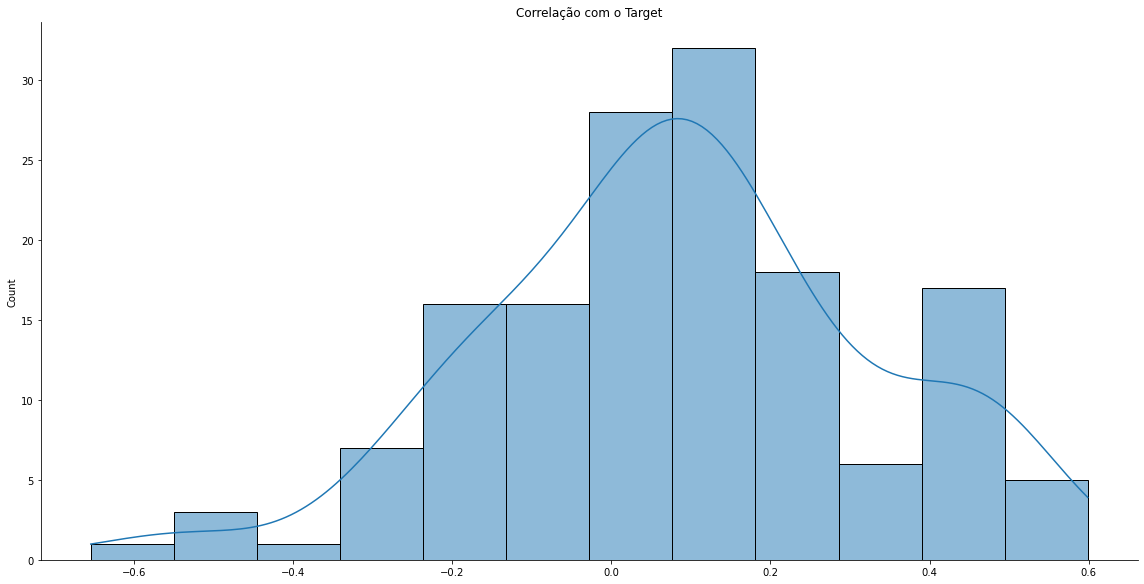

In [22]:
target_corr_array = df_corr_target.values.flatten()
sns.displot(data=target_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação com o Target')
plt.show()

##### ECDF

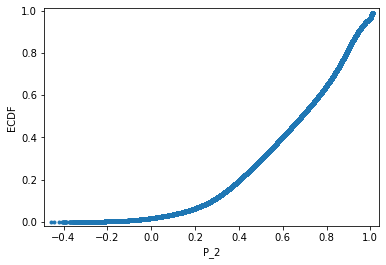

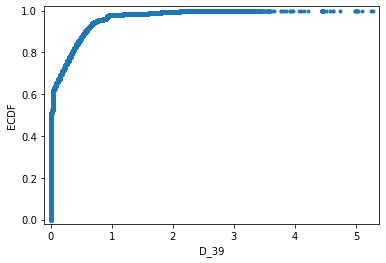

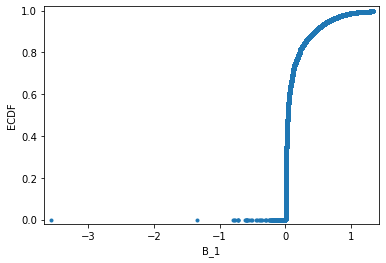

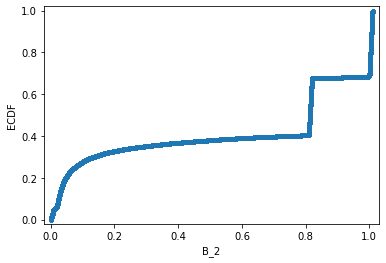

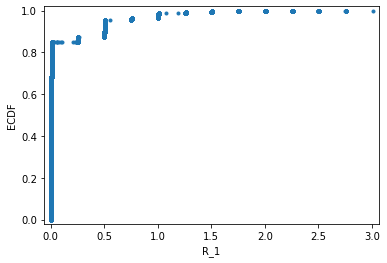

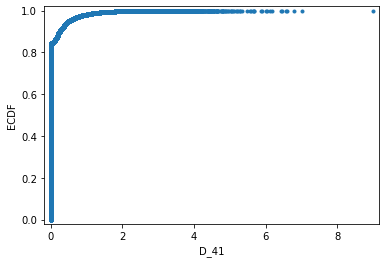

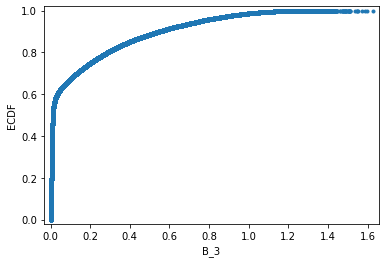

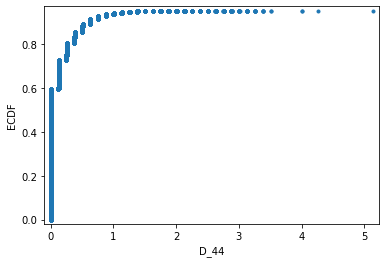

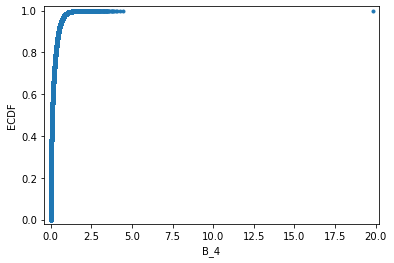

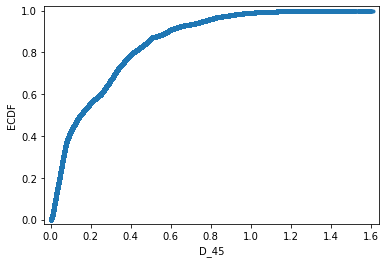

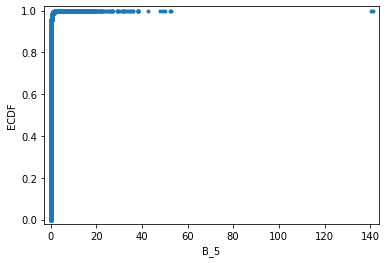

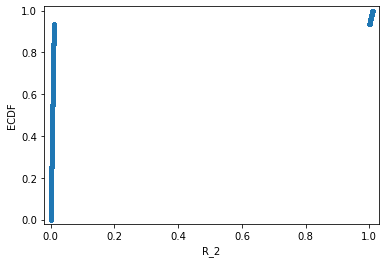

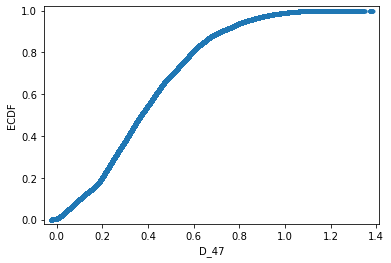

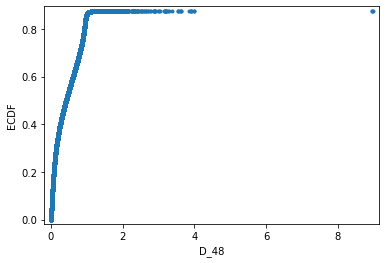

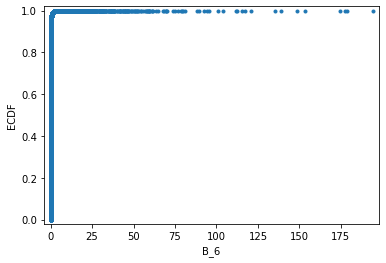

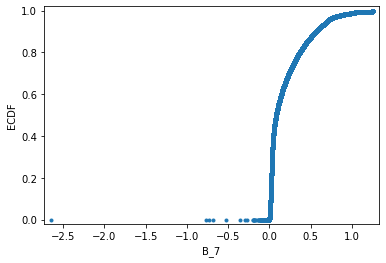

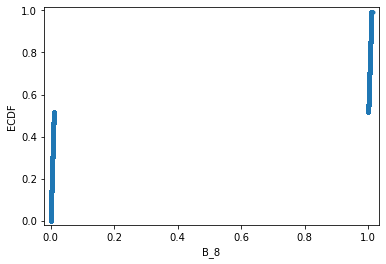

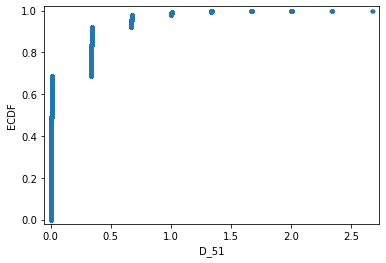

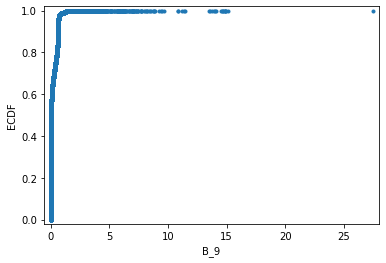

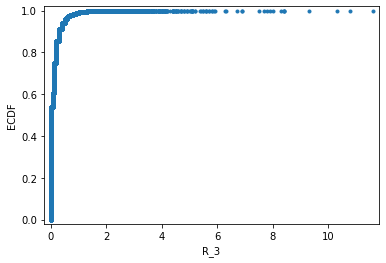

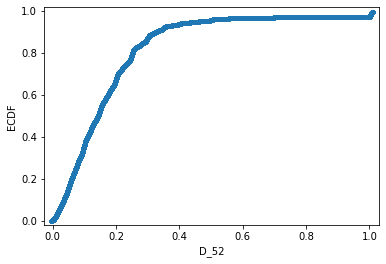

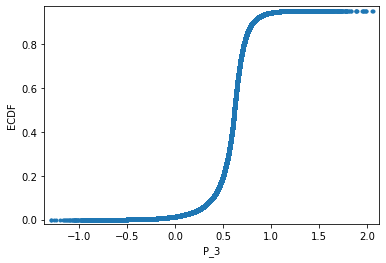

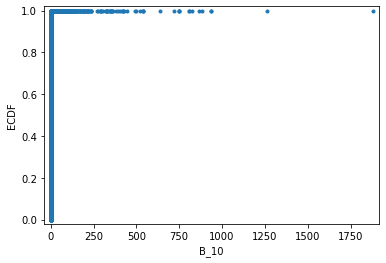

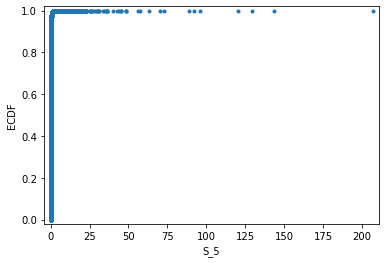

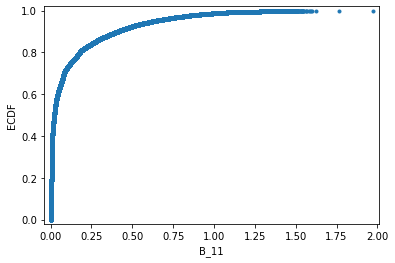

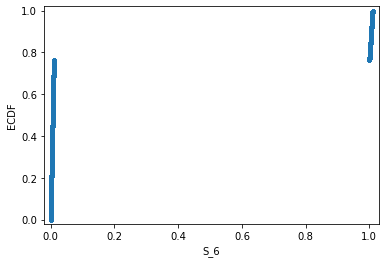

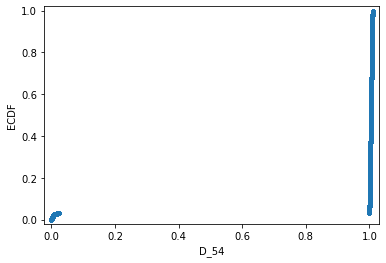

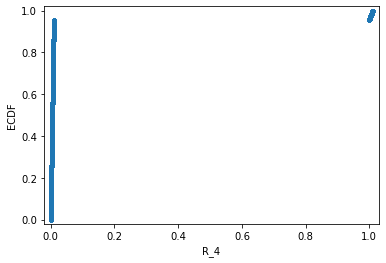

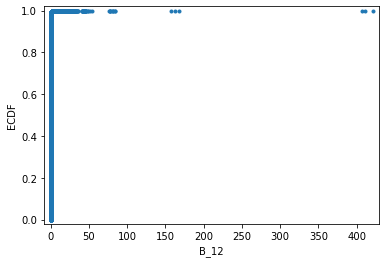

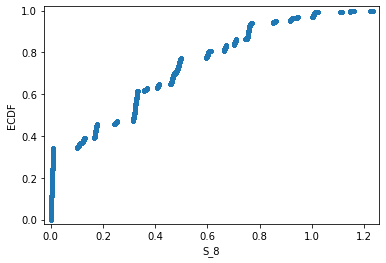

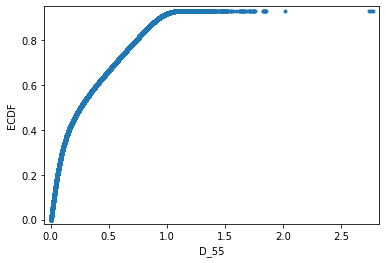

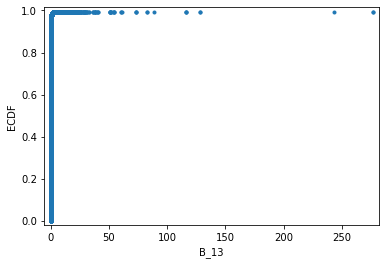

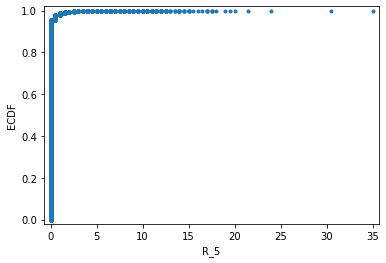

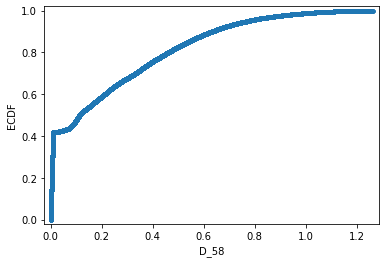

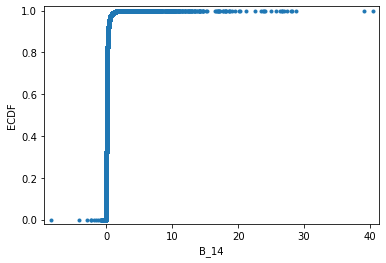

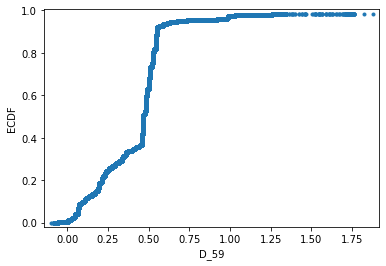

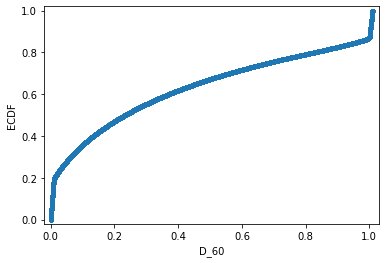

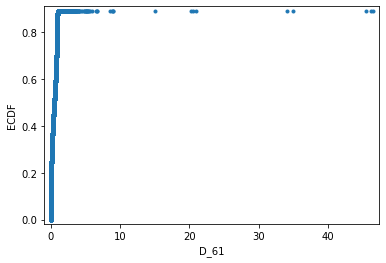

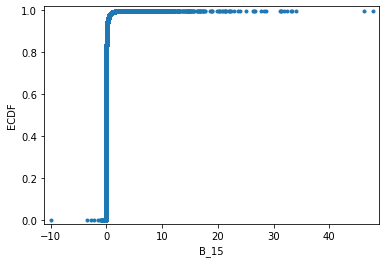

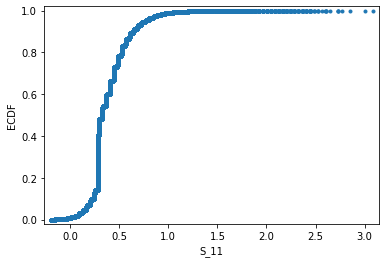

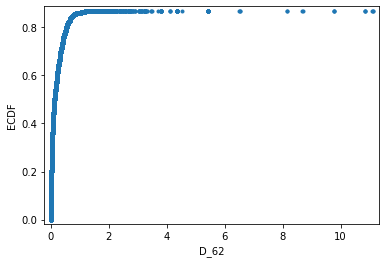

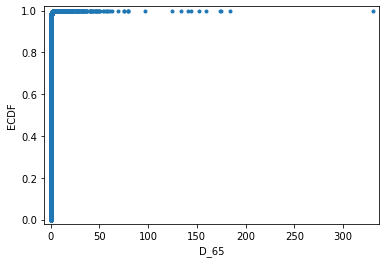

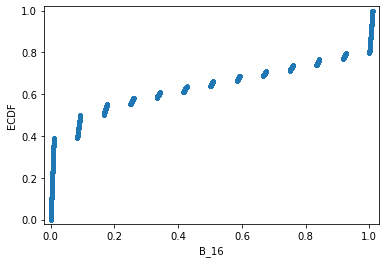

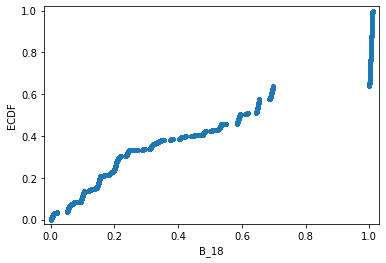

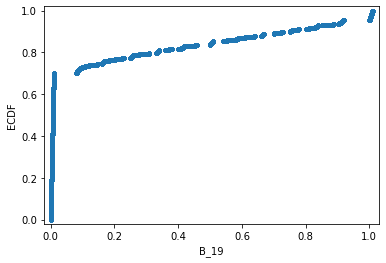

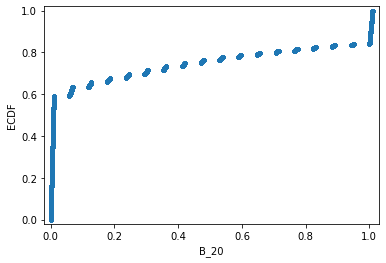

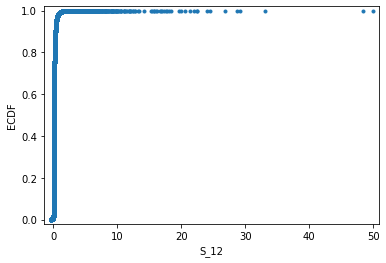

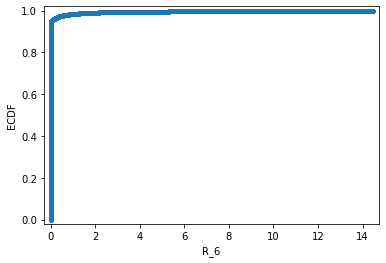

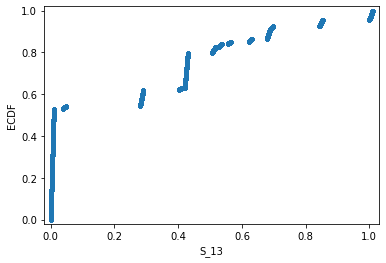

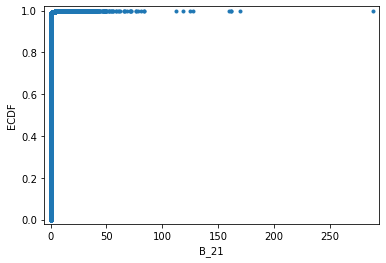

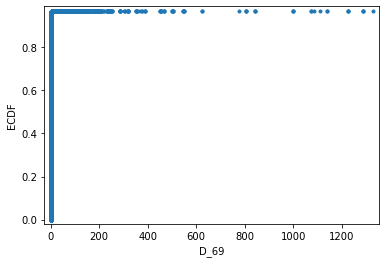

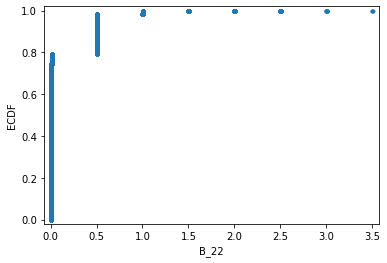

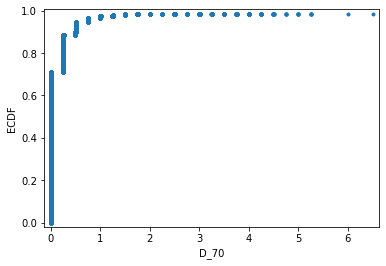

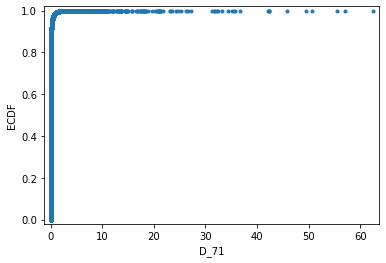

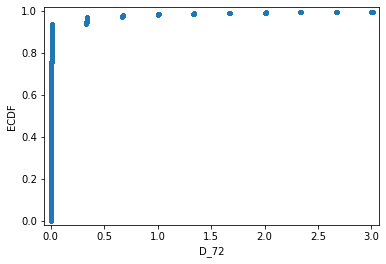

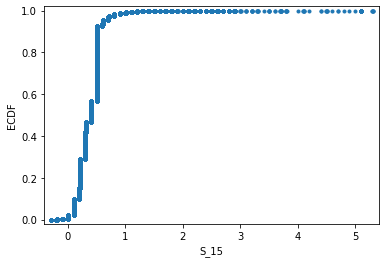

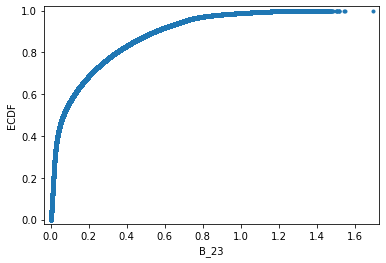

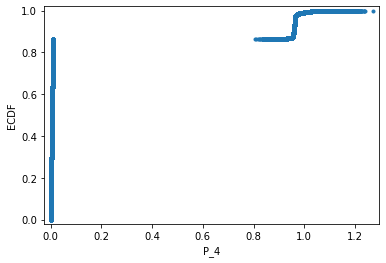

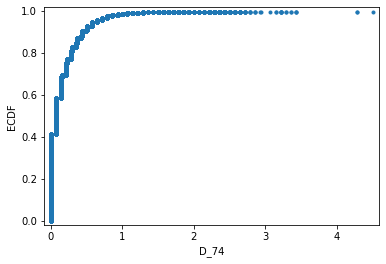

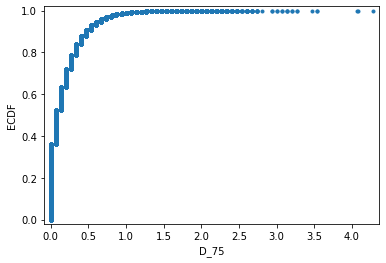

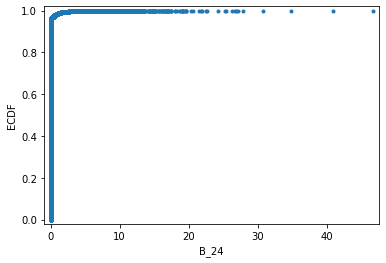

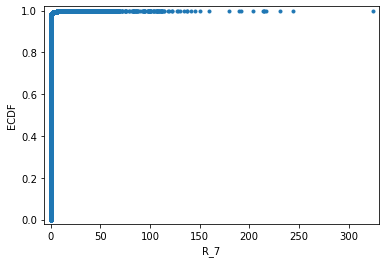

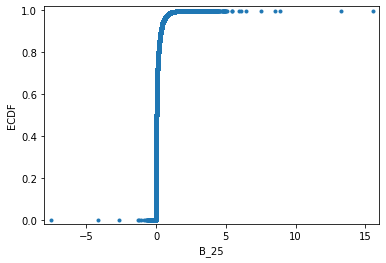

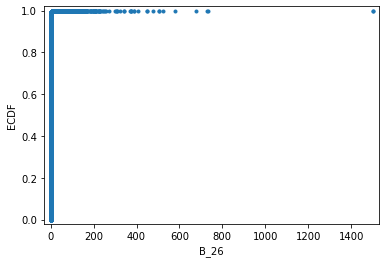

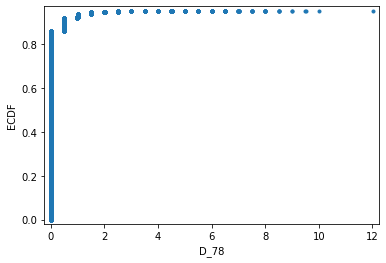

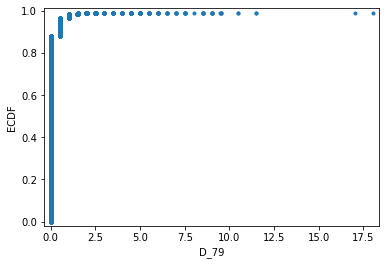

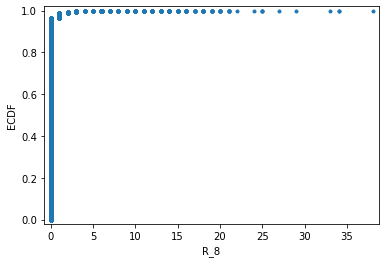

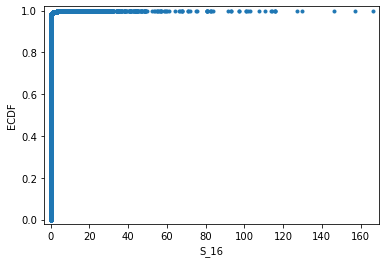

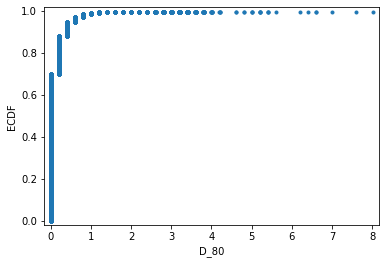

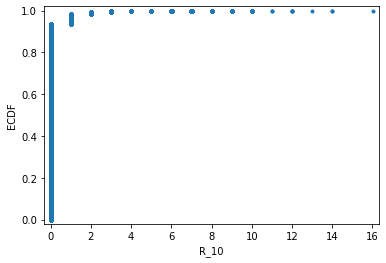

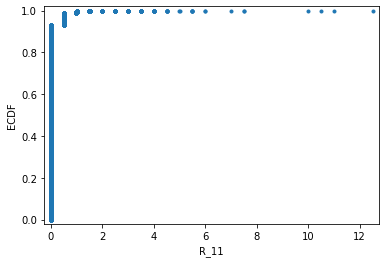

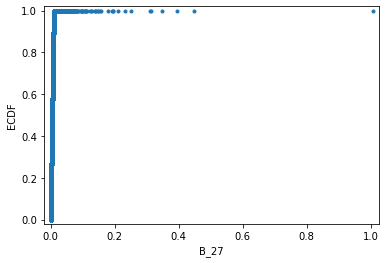

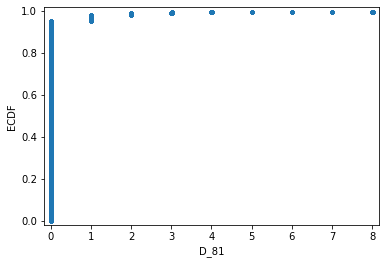

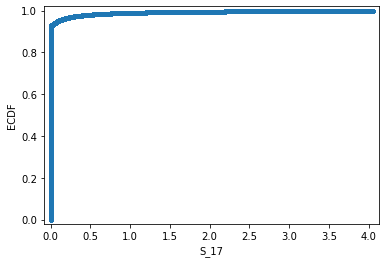

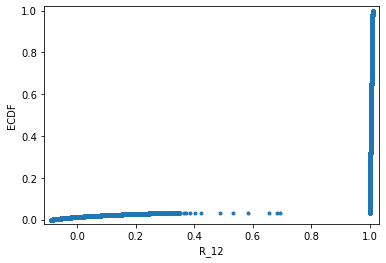

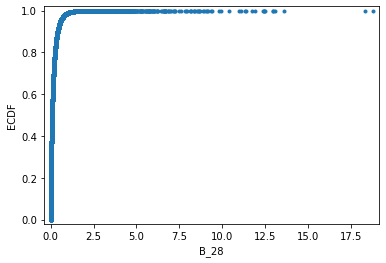

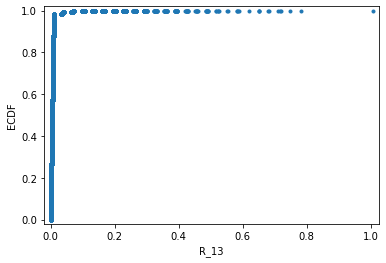

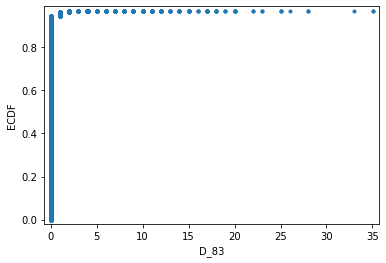

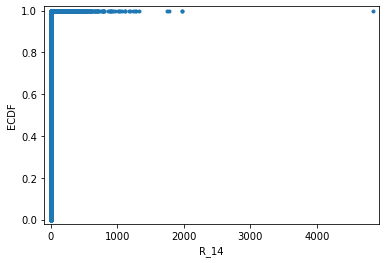

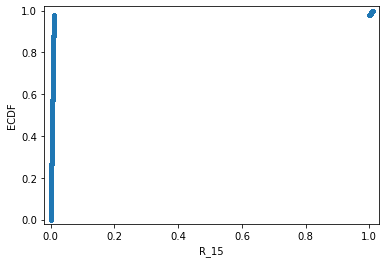

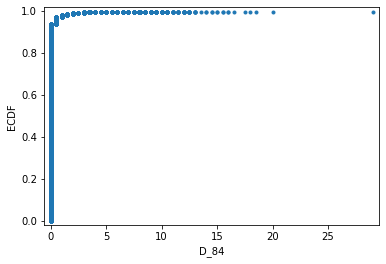

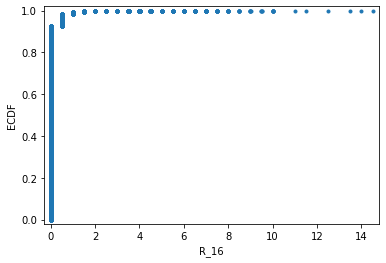

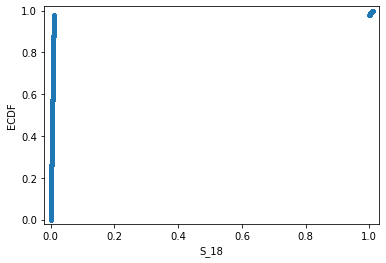

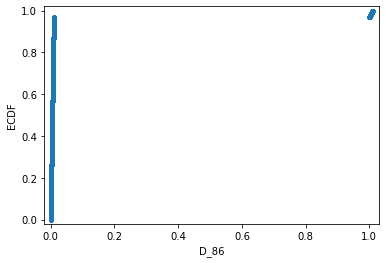

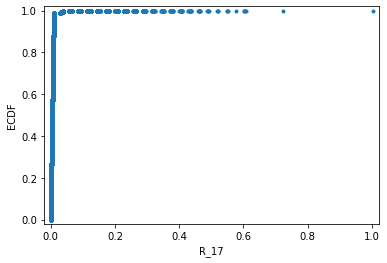

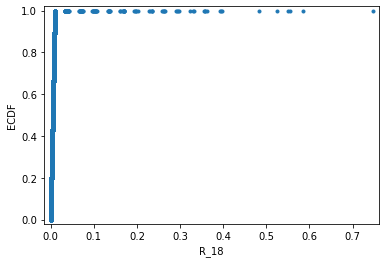

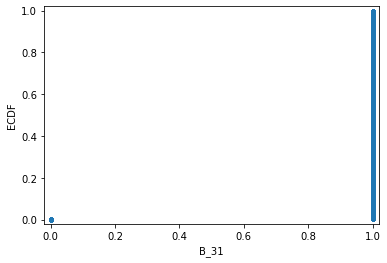

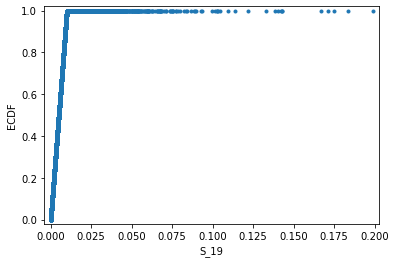

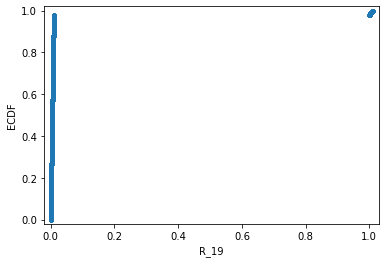

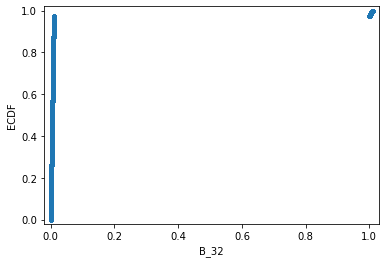

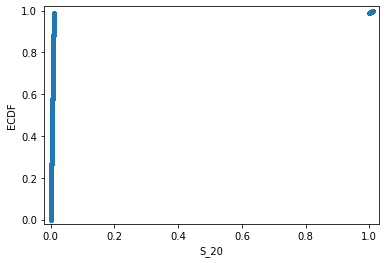

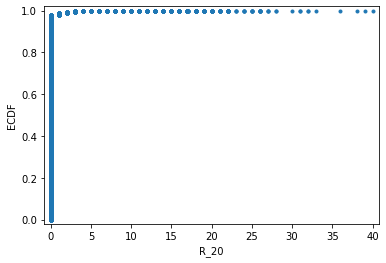

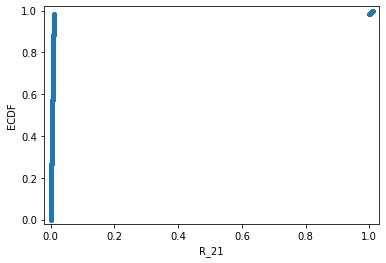

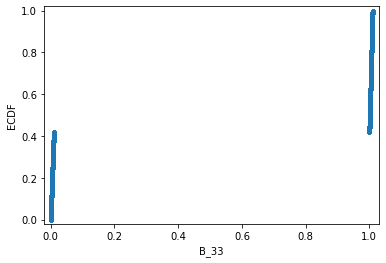

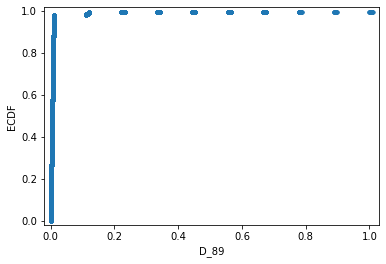

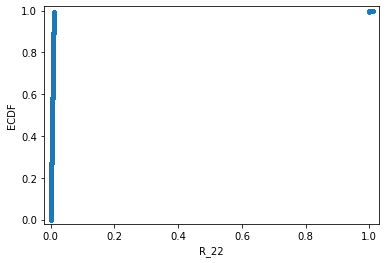

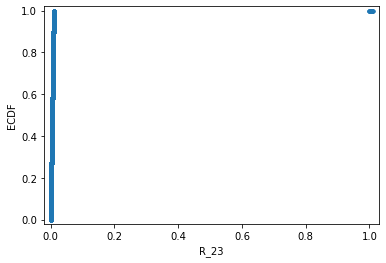

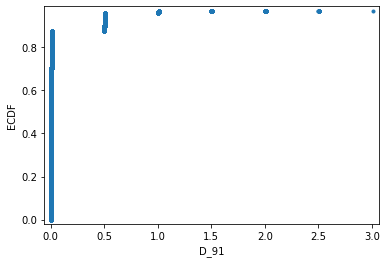

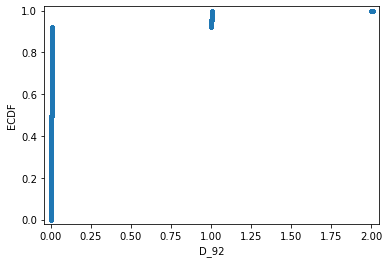

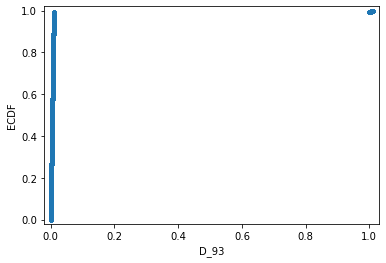

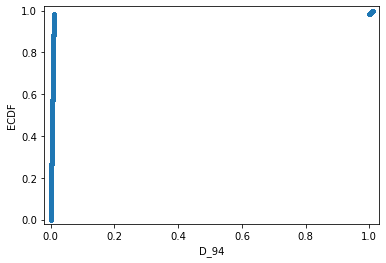

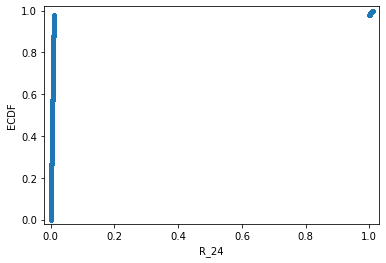

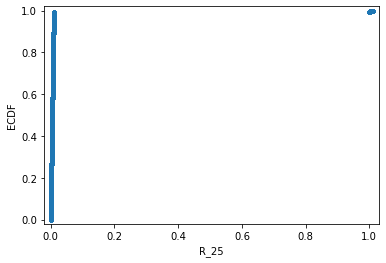

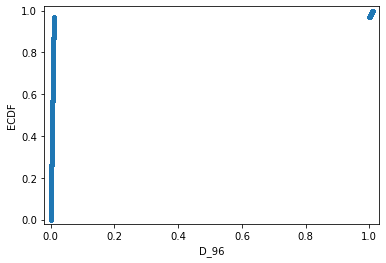

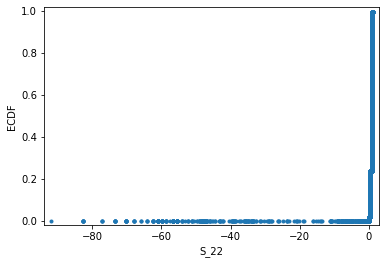

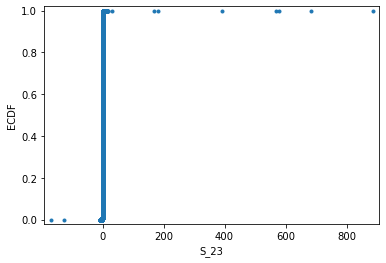

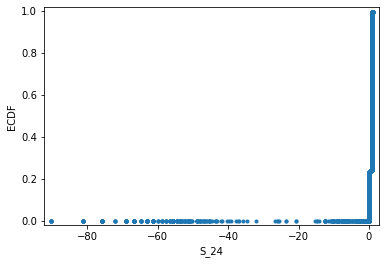

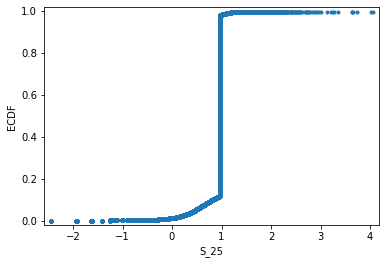

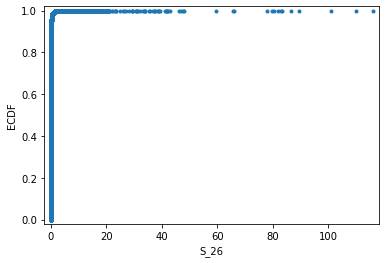

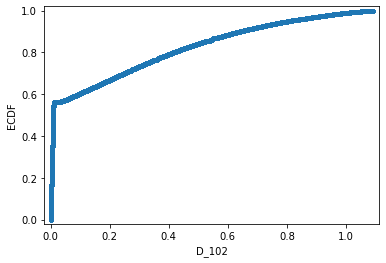

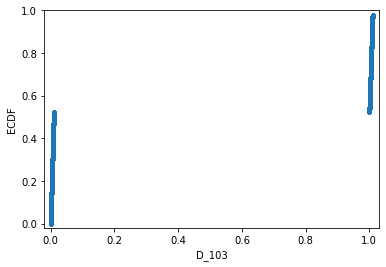

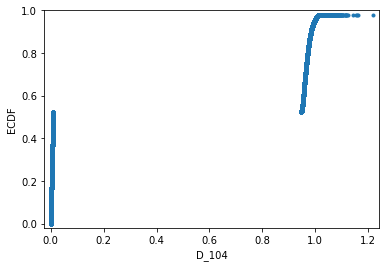

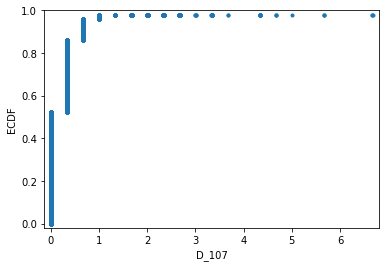

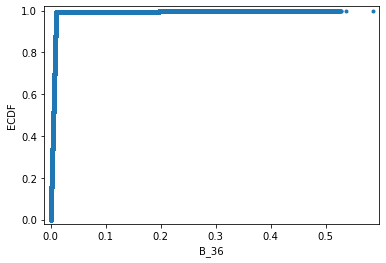

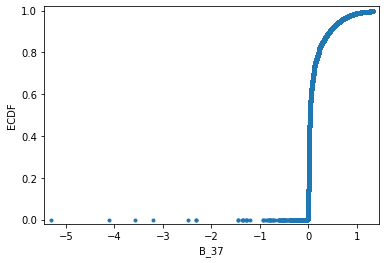

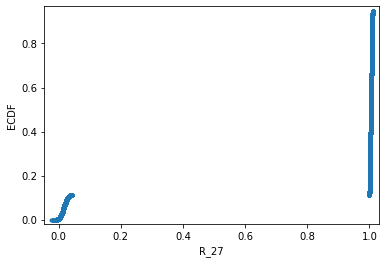

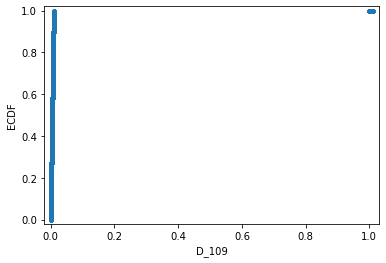

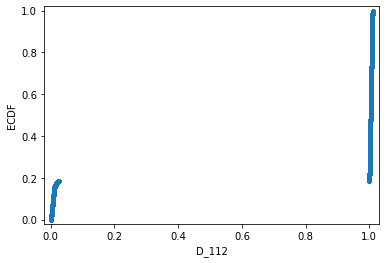

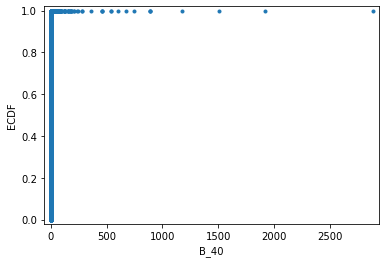

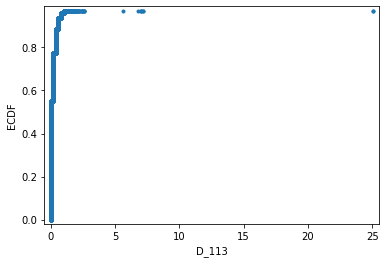

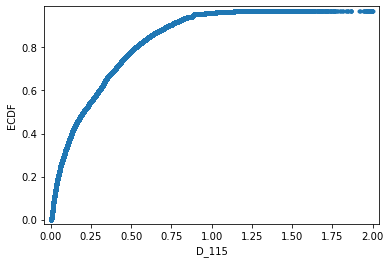

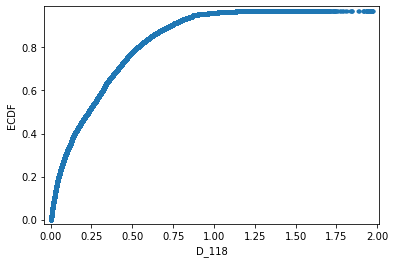

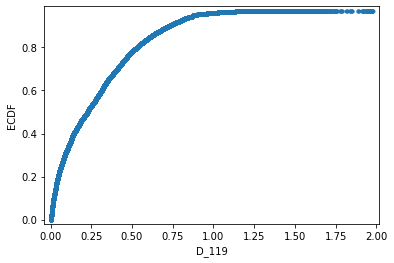

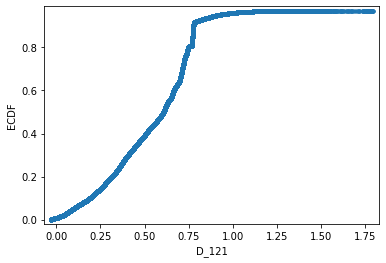

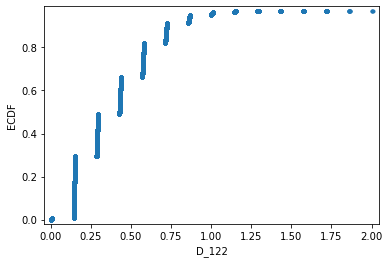

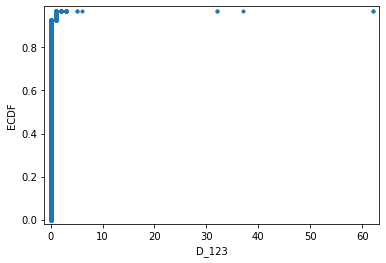

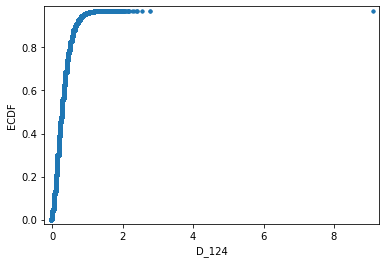

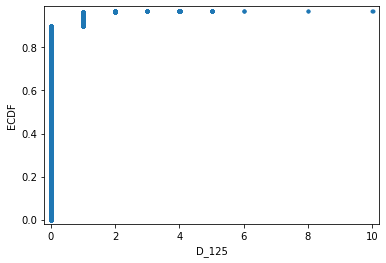

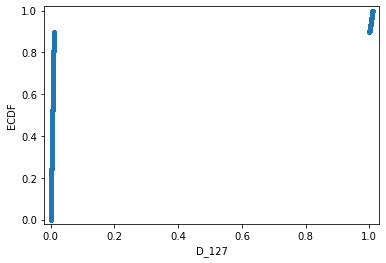

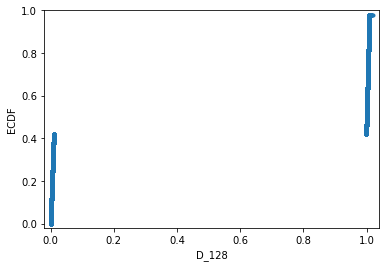

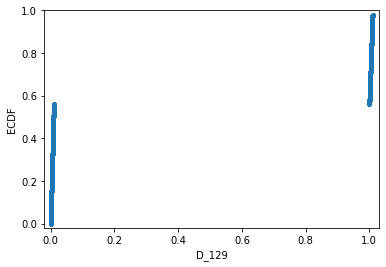

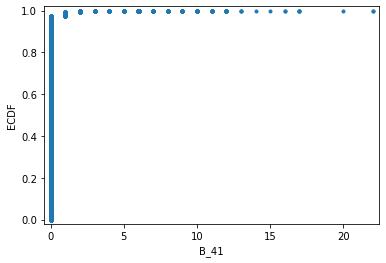

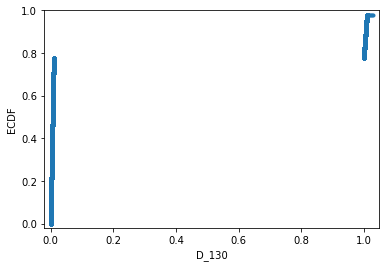

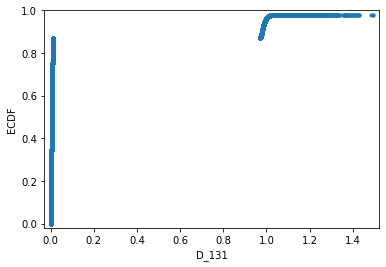

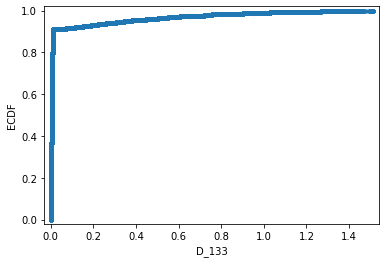

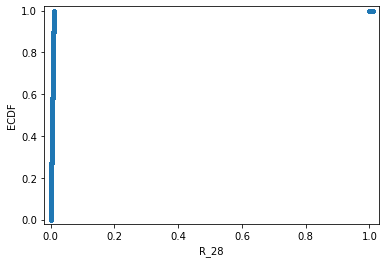

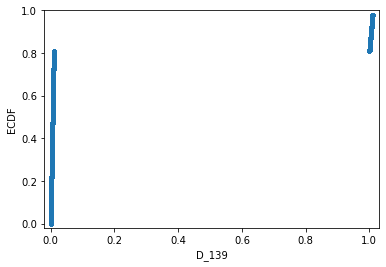

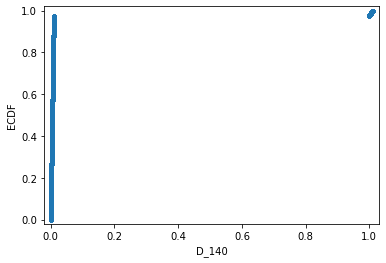

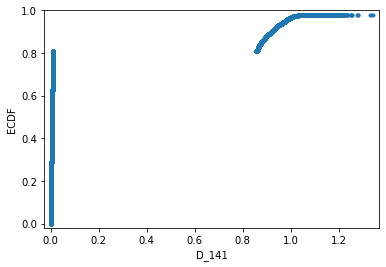

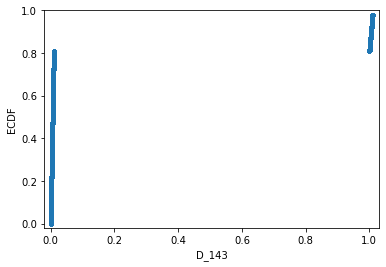

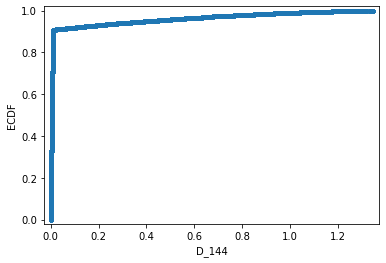

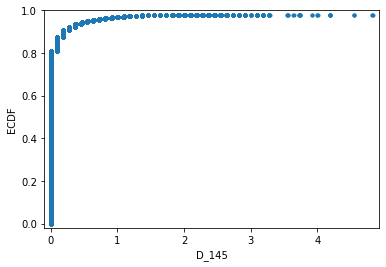

In [23]:
for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        x = np.sort(df[col])
        y = np.arange(1, len(x)+1) / len(x)
        plt.plot(x, y, marker='.', linestyle='none')
        plt.xlabel(f'{col}')
        plt.ylabel('ECDF')
        plt.margins(0.02)
        plt.show()

# PCA

In [24]:
pca = PCA(n_components=0.9999999)

In [25]:
X = df.drop(['customer_ID', 'target'], axis=1)
X.drop(cat_data, axis=1, inplace=True)
X.dropna(axis=0, inplace=True)

In [26]:
X_pca = pca.fit_transform(X)

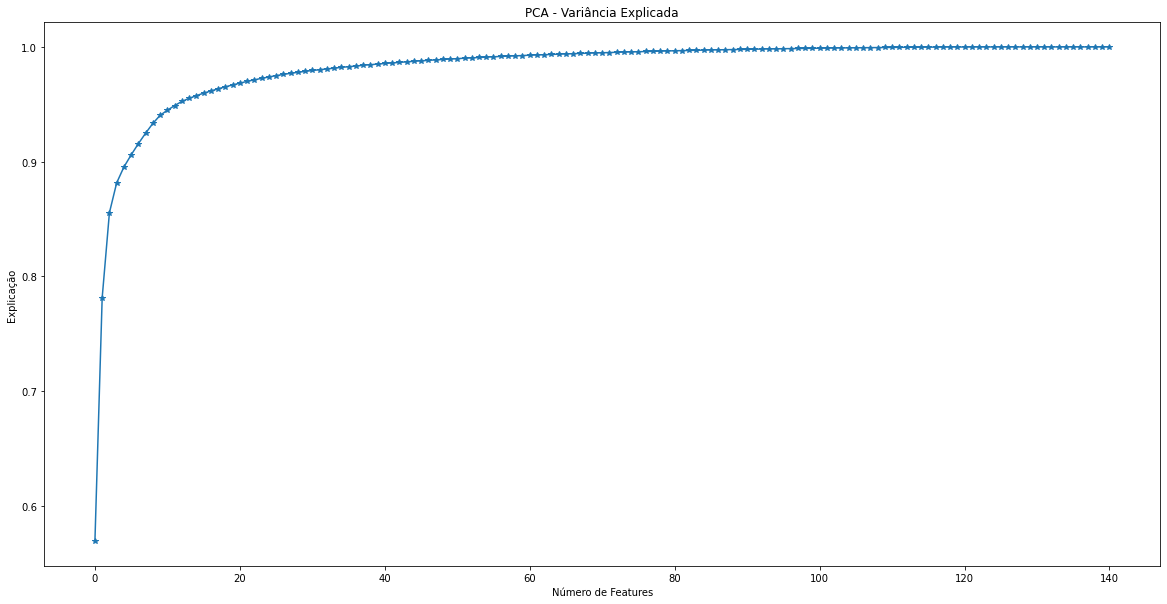

In [27]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*-')
plt.title('PCA - Variância Explicada')
plt.xlabel('Número de Features')
plt.ylabel('Explicação')
plt.show()